# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

# **Business Context**
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

# **Objective**
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

Is the time spent on the new page the same for the different language users?

# **Data Dictionary**
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Python Course/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

## Data Overview

In [ ]:
"Viewing the first and last few rows of the dataset"
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
'Checking the shape of the dataset'
df.shape

(100, 6)

In [ ]:
'Getting the statistical summary for the variables'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


## Missing Values & Duplicates

In [ ]:
'Check for missing values'
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
'Check for duplicates'
df.duplicated().sum()

np.int64(0)

### Univariate Analysis

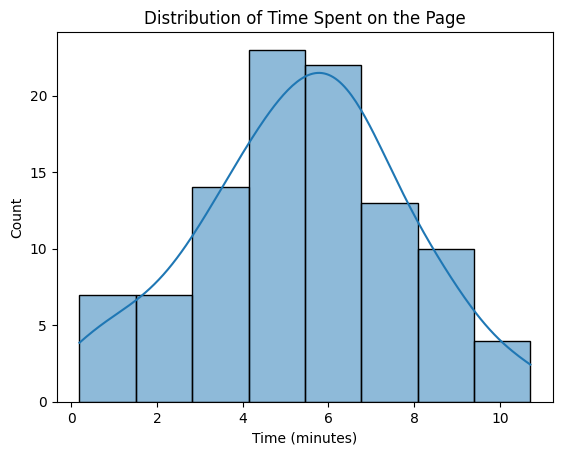

In [ ]:
sns.histplot(df['time_spent_on_the_page'], kde=True)
plt.title('Distribution of Time Spent on the Page')
plt.xlabel('Time (minutes)')
plt.ylabel('Count')
plt.show()

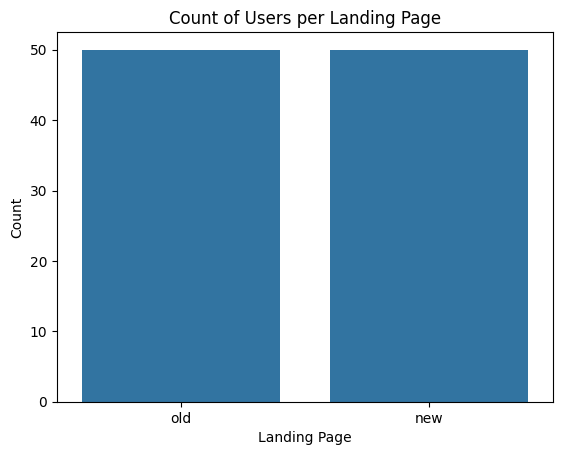

In [ ]:
sns.countplot(x='landing_page', data=df)
plt.title('Count of Users per Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.show()

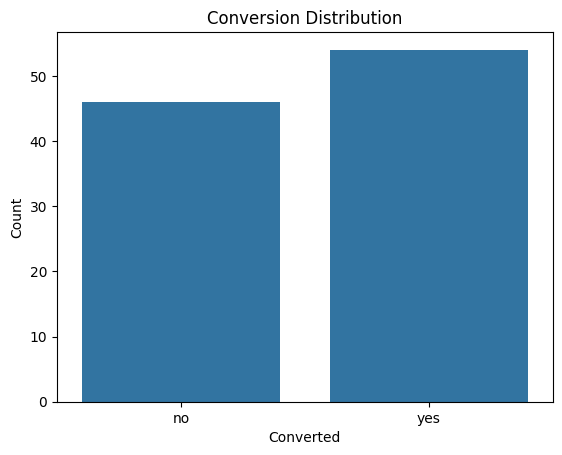

In [ ]:
sns.countplot(x='converted', data=df)
plt.title('Conversion Distribution')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

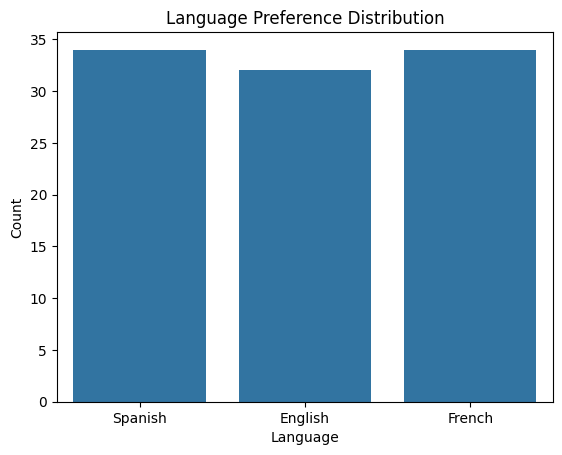

In [ ]:
sns.countplot(x='language_preferred', data=df)
plt.title('Language Preference Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

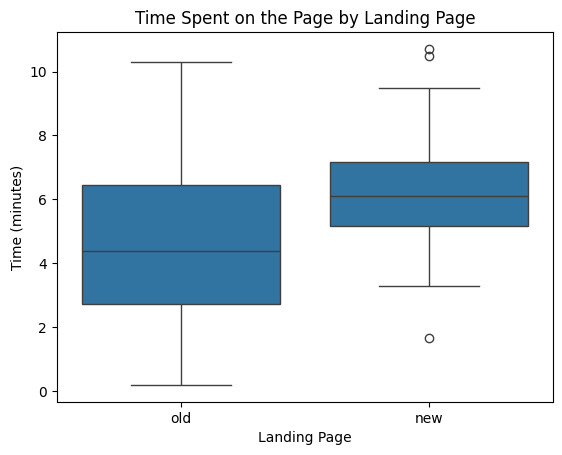

In [ ]:
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.title('Time Spent on the Page by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time (minutes)')
plt.show()

In [ ]:
print(df['converted'].unique())

['no' 'yes']


In [ ]:
df['converted'] = df['converted'].astype(str).str.strip().str.lower()
df['converted'] = df['converted'].map({'yes': 1, 'no': 0})
print(df['converted'].unique())

[0 1]


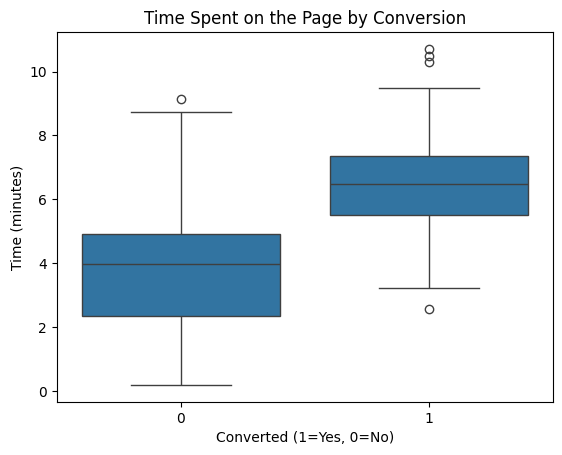

In [ ]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page')
plt.title('Time Spent on the Page by Conversion')
plt.xlabel('Converted (1=Yes, 0=No)')
plt.ylabel('Time (minutes)')
plt.show()

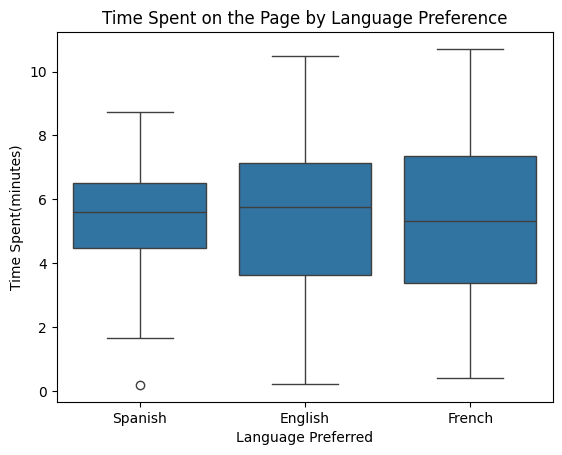

In [ ]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.title('Time Spent on the Page by Language Preference')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent(minutes)')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

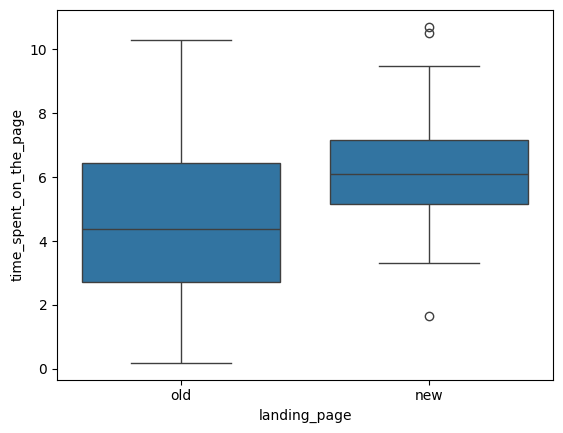

In [ ]:
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.show()


### Step 1: Define the null and alternate hypotheses

H0: There is no difference on the average time spent in the old and new landing pages.

Ha: Users spend more time on average in the new landing page than on the old one.

### Step 2: Select Appropriate test

2 Sample T-Test

### Step 3: Decide the significance level

As provided in the problem statement, significance level is 5%.
  α=0.05

### Step 4: Collect and prepare data

In [ ]:
time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
print(f'New page users: {len(time_new)}')
print(f'Old page users: {len(time_old)}')

New page users: 50
Old page users: 50


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(time_new, time_old)

print("t-statistic:", round(t_stat, 2))
print("p-value:", round(p_value, 2))

t-statistic: 3.79
p-value: 0.0


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.000263224705619001 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is 0.00, which is less than the significance level, we reject the null hypothesis. There is sufficient evidence to conclude that users spend significantly more time on the new landing page than on the old one. This suggests that the new landing page is more engaging and effective in retaining user attention.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Perform Visual Analysis

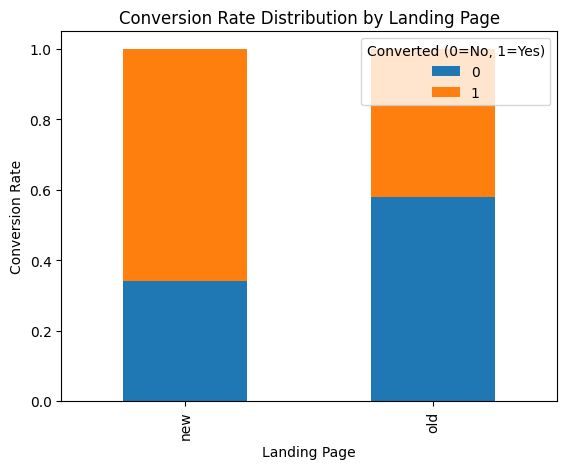

In [ ]:
pd.crosstab(df['landing_page'], df['converted'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Conversion Rate Distribution by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Conversion Rate')
plt.legend(title='Converted (0=No, 1=Yes)')
plt.show()

### Step 1: Define the null and alternate hypotheses


H0:The conversion rate for the new landing page is less than or equal to the conversion rate for the old page.

Ha:The conversion rate for the new landing page is greater than the conversion rate for the old page.

### Step 2: Select Appropriate test

Two proportion z-test

### Step 3: Decide the significance level

We use a 5% significance level

### Step 4: Collect and prepare data

In [ ]:
converted_new = df[df['landing_page'] == 'new']['converted']
converted_old = df[df['landing_page'] == 'old']['converted']
successes = [converted_new.sum(), converted_old.sum()]
n= [converted_new.count(), converted_old.count()]
print('Conversions:', successes)
print('Sample sizes:', n)

Conversions: [np.int64(33), np.int64(21)]
Sample sizes: [np.int64(50), np.int64(50)]


### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
z_stat, p_value = proportions_ztest(successes, n, alternative='larger')

print("z-statistic:", round(z_stat, 2))
print("p-value:", round(p_value, 2))

z-statistic: 2.41
p-value: 0.01


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is 0.01, which is less that the significance level, we reject the null hypothesis. Therefor, there is sufficient evidence to conclude that the conversion rate for the new landing page is significantly higher than that of the old landing page. This indicates that the new design improves engagement and also increases the likelihood of users subscribing.

## 3. Is the conversion and preferred language are independent or related?

Perform Visual Analysis

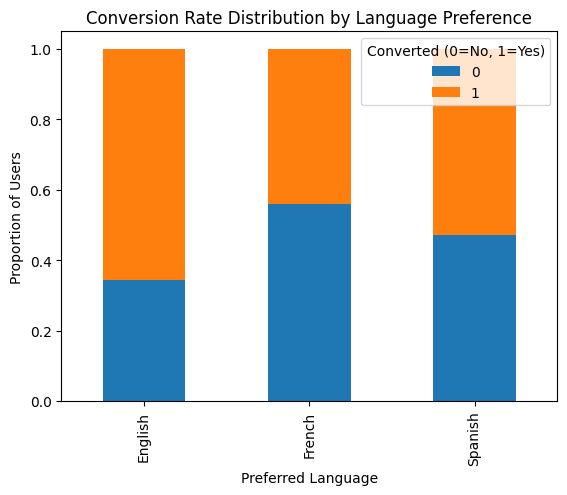

In [ ]:
pd.crosstab(df['language_preferred'], df['converted'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Conversion Rate Distribution by Language Preference')
plt.xlabel('Preferred Language')
plt.ylabel('Proportion of Users')
plt.legend(title='Converted (0=No, 1=Yes)')
plt.show()

### Step 1: Define the null and alternate hypotheses

H0:Conversion status is independent of preferred language.

Ha:Conversion status is dependent on preferred language.

### Step 2: Select Appropriate test

Chi-square test of independence

### Step 3: Decide the significance level

We use a 5% significance level

### Step 4: Collect and prepare data

In [ ]:
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,0,1
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", round(chi2_stat, 2))
print("Degrees of Freedom:", dof)
print("p-value:", round(p_value, 2))

Chi-square statistic: 3.09
Degrees of Freedom: 2
p-value: 0.21


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value from the chi-square test is less that 0.05, we reject the null hypothesis. There is sufficient evidence to conclude that the conversion status depends on the user's preferred language. This suggests that tailoring the landing page by language group may enhance conversion performance.

## 4. Is the time spent on the new page same for the different language users?

Perform Visual Analysis

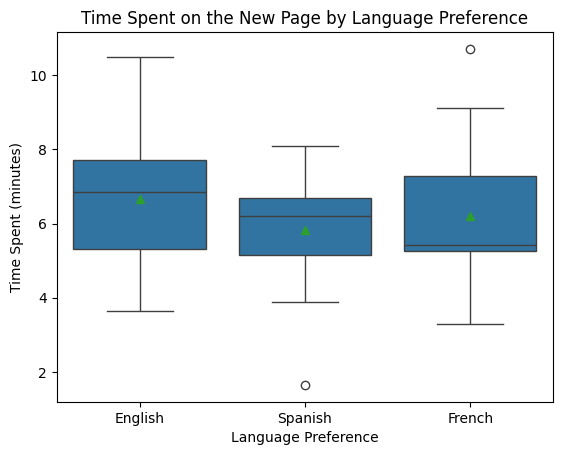

In [ ]:
df_new = df[df['landing_page'] == 'new']
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', showmeans= True, data=df_new)
plt.title('Time Spent on the New Page by Language Preference')
plt.xlabel('Language Preference')
plt.ylabel('Time Spent (minutes)')
plt.show()

### Step 1: Define the null and alternate hypotheses

H0: The average time spent on the new landing page is the same across all language groups.

Ha: At least one language group has a different average time spent on the new landing page.

### Step 2: Select Appropriate test

ANOVA

### Step 3: Decide the significance level

We are using a 5% significance level

### Step 4: Collect and prepare data

In [ ]:
df_new = df[df['landing_page'] == 'new']
groups = [group['time_spent_on_the_page'].values
          for name, group in df_new.groupby('language_preferred')]
for name, group in df_new.groupby('language_preferred'):
    print(f'{name}: {len(group)} users')

English: 16 users
French: 17 users
Spanish: 17 users


In [ ]:
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*groups)
print("F-statistic:", round(f_stat, 2))
print("P-value:", round(p_value, 2))

F-statistic: 0.85
P-value: 0.43


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is 0.43, which is greater than the significance level we fail to reject the null hypothesis. There is not enough statistical evidence to conclude that the average time spent on the new landing page differs across language groups. This suggests that the new page is performing consistently in terms of engagement across all language preferences.

## Conclusion and Business Recommendations

The A/B test analyis conducted for E-News Express suggests that the newly designed landing page significantly outperforms the old one in both user engagement and conversion rates. Revealing that users spend more time on the new landing page. Similarly, the conversion rate for the new page is statistically higher than the old version. These results strongly support the effectiveness of the updated design. Evidence also suggests that the new layout had more engagement regardles of the language.

Based on these insights, it is recommended that E-News Express fully implement the new landing page for all users. To further boost engagement and conversions, the company should consider applying the same design strategy to other areas of the website. Since performance is consistent across languages, there is no need to further customize the landing page for each language group. However, deeper testing into content preferences by region is suggested to further be explored. Lastly, it's advised that E-News Express continue using A/B testing to test for future updates. Ensuring an optimized user experience and overall business performance.

___